# **Heart Failure Prediction Using Machine Learning** 🏥

## **1. Introduction** 📌
Cardiovascular diseases (CVDs) have led to the deaths of over **18 million people globally**. This project aims to predict heart failure using machine learning models. The dataset consists of 11 features that represent various health metrics.

<img src="image/image-10.png" alt="Heart" width="500">


### 1️⃣ Data Preprocessing - [Heart Failure Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data)
✔ Load dataset (`heart_data`)  
✔ Handle missing values (if any)  
✔ Exploratory Data Analysis (EDA) 
✔ Feature Encoding  
✔ Standardization applied to numerical features  

### 2️⃣ Model Building
✔ Train multiple models:  
   - Logistic Regression  
   - Random Forest  
   - Support Vector Machine (SVM)  
   - Decision Tree  
   - GradientBoosting  
   

### 3️⃣ Evaluation Metrics
✔ **Accuracy**  
✔ **Precision**  
✔ **Recall**  
✔ **F1-Score**  
✔ **Confusion Matrix**  

---




### **Import libraries**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter('ignore')

### **Load Data**

In [76]:
# Load Data
heart_data = pd.read_csv("Dataset/heart.csv")

In [77]:
# View First
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
# View Tail 
heart_data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [79]:
# Shape of Data
heart_data.shape

(918, 12)

In [80]:
# Get a summary of the data types and missing values
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### **Data Cleaning**

In [81]:
# Checking for missing Data 
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [82]:
# Check for duplicate values
print("Number of duplicate values", heart_data.duplicated().sum())

Number of duplicate values 0


# **Exploratory Data Analysis (EDA)**

In [83]:
# Summary Statistics
print("Summary Statistics:")
heart_data.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### **Histogram: Age Distribution**

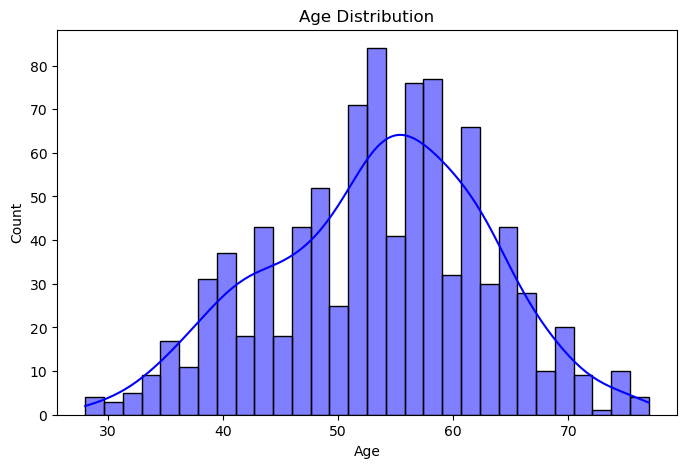

In [84]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(heart_data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### **Distribution Of The Dependent Variable**

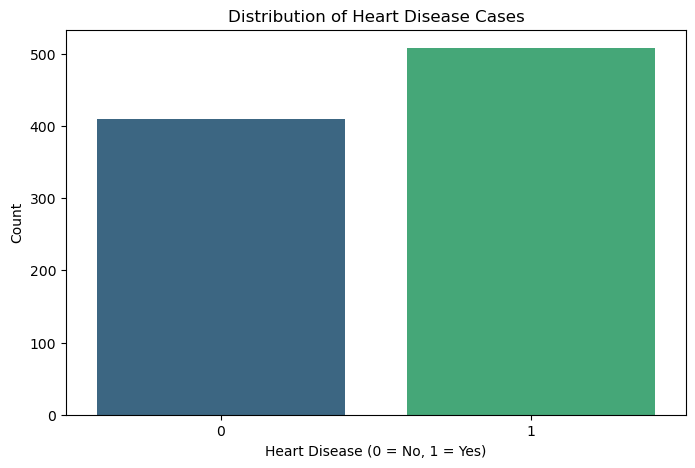

In [85]:
# Data Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=heart_data['HeartDisease'], palette="viridis")
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### **Distribution of Categorical**

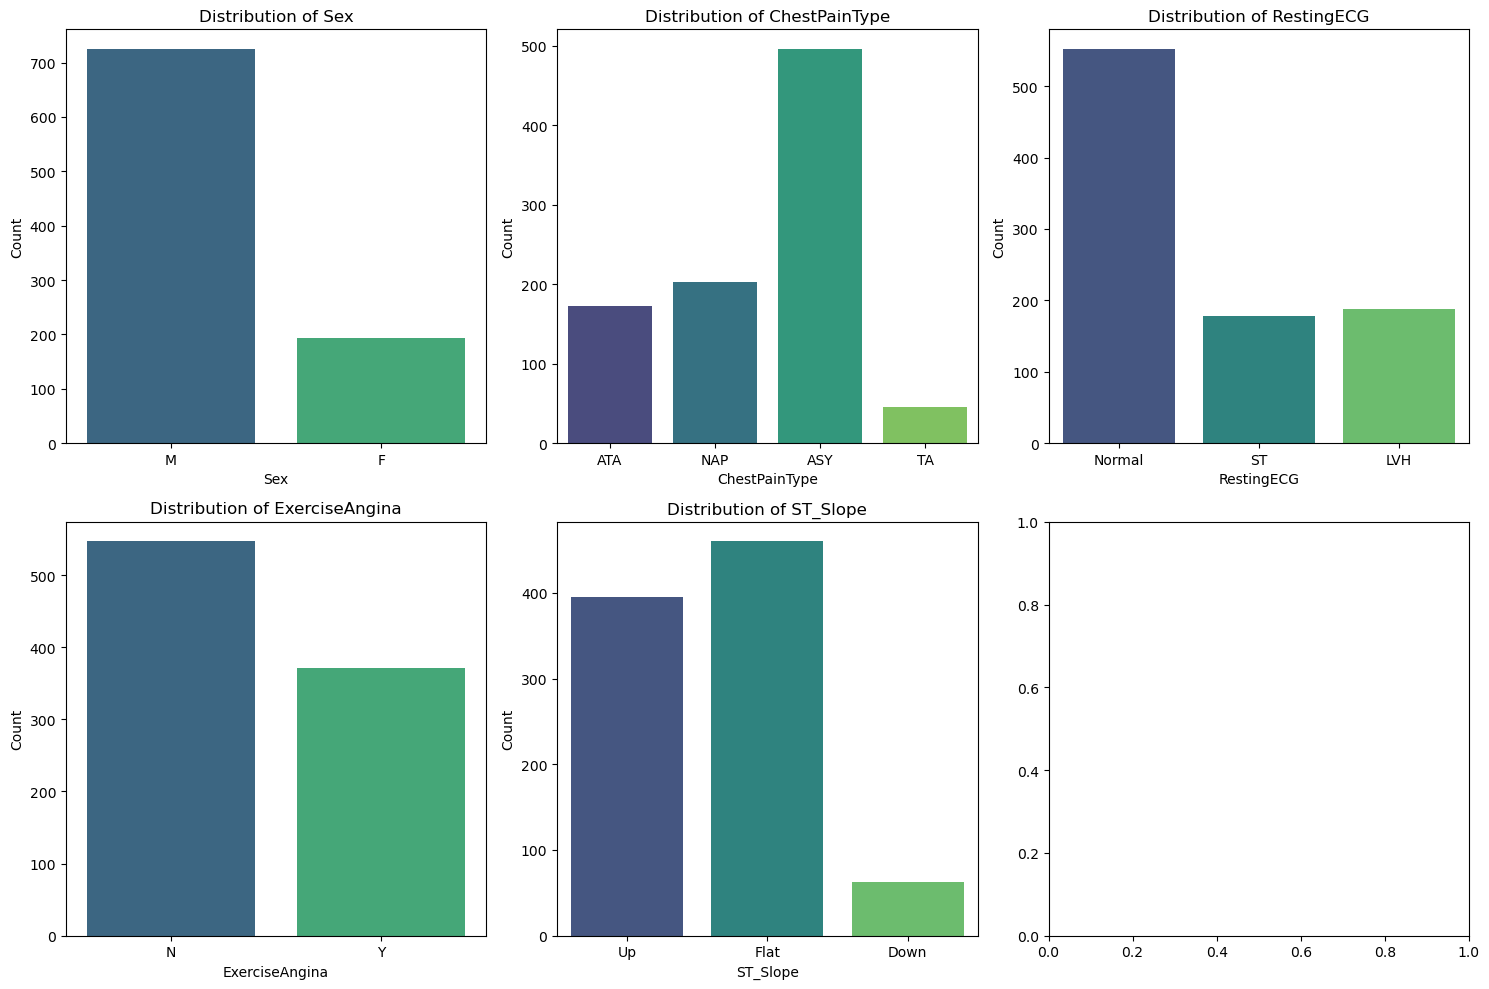

In [86]:
# Categorical Feature Distributions
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=heart_data[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### **Comparison of Sex with Heart Disease**

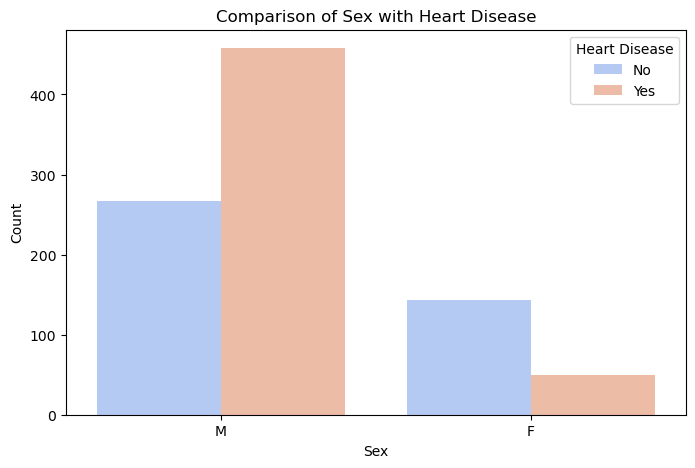

In [87]:
# Comparison of Sex with Heart Disease
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='HeartDisease', data=heart_data, palette='coolwarm')
plt.title('Comparison of Sex with Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


### **Comparison The Numerical Feature With Heart Disease**

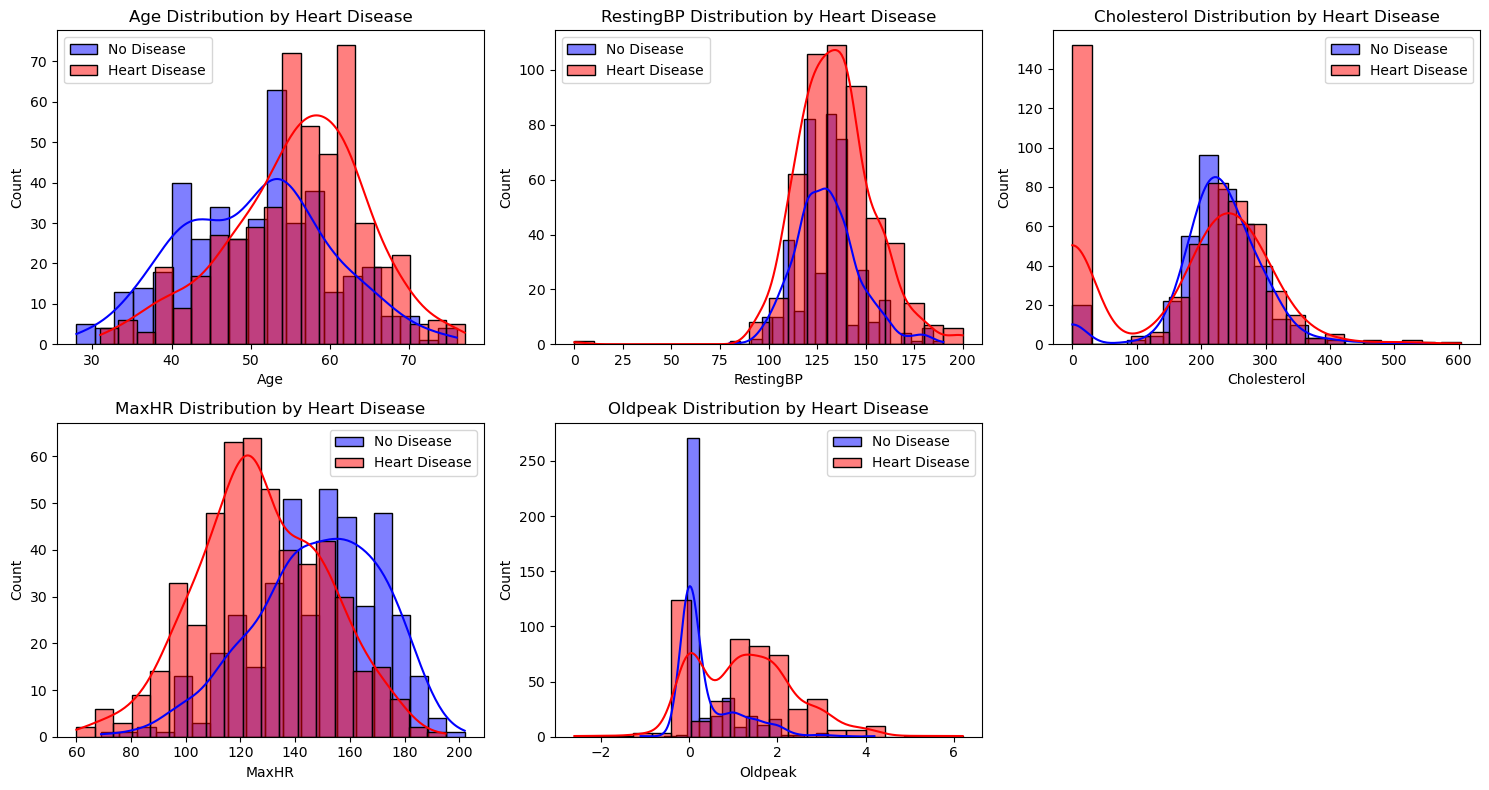

In [88]:
# Numerical Feature Distribution by Heart Disease
plt.figure(figsize=(15, 8))
numerical_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(heart_data[heart_data["HeartDisease"] == 0][col], bins=20, kde=True, color="blue", label="No Disease")
    sns.histplot(heart_data[heart_data["HeartDisease"] == 1][col], bins=20, kde=True, color="red", label="Heart Disease")
    plt.legend()
    plt.title(f"{col} Distribution by Heart Disease")

plt.tight_layout()
plt.show()

### **Correlation Analysis**

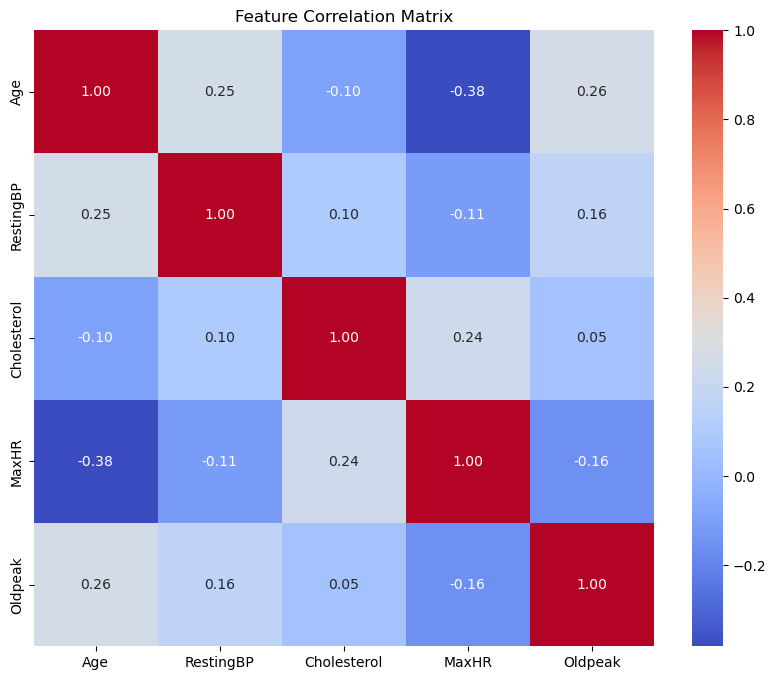

In [89]:
# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


### **Handling Anomalies**

In [90]:
# Handling anomalies: Replace 0 in Cholesterol and RestingBP with median values
heart_data["Cholesterol"].replace(0, heart_data["Cholesterol"].median(), inplace=True)
heart_data["RestingBP"].replace(0, heart_data["RestingBP"].median(), inplace=True)


### **Separate the Dependent (y) and Independent (X) variable**

In [91]:
# Splitting data into features and target
X = heart_data.drop(columns=["HeartDisease"])
y = heart_data["HeartDisease"]

### **Split Data Into Train and Test**

In [92]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **One-Hot Ecoding and Standerlization**

In [93]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols),
    ]
)

# Apply preprocessing to train and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## **Modeling**


Model Performance:
                      Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
Random Forest        0.858696               0.854250            0.856657   
Logistic Regression  0.836957               0.833511            0.841607   
Decision Tree        0.771739               0.770885            0.778250   
Gradient Boosting    0.836957               0.832160            0.837966   
SVM                  0.826087               0.822609            0.830441   

                     F1-Score (Macro Avg)  
Random Forest                    0.855346  
Logistic Regression              0.835007  
Decision Tree                    0.770000  
Gradient Boosting                0.834135  
SVM                              0.824008  


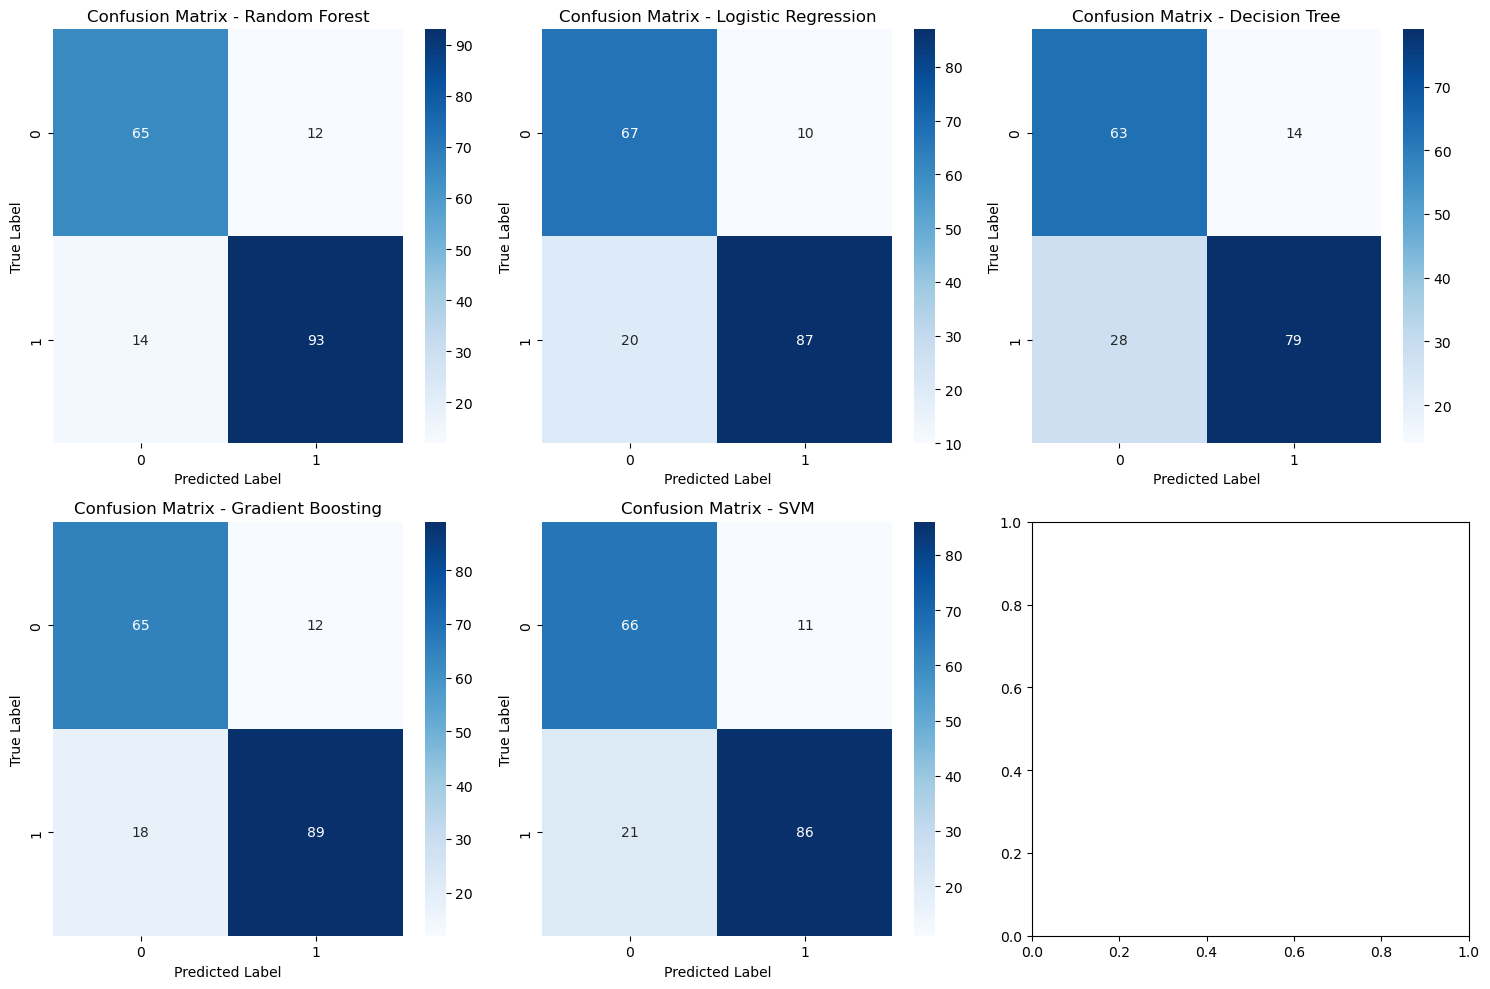

In [94]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# Train and evaluate models
results = {}
conf_matrices = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision (Macro Avg)": classification_rep["macro avg"]["precision"],
        "Recall (Macro Avg)": classification_rep["macro avg"]["recall"],
        "F1-Score (Macro Avg)": classification_rep["macro avg"]["f1-score"],
    }
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

# Convert results to DataFrame
results_df = pd.DataFrame(results).transpose()
print("\nModel Performance:\n", results_df)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## 📝 Author
Developed by **Paul**

For any inquiries, feel free to reach out!